In [1]:
import pandas as pd
import sqlite3
import numpy as np
from matplotlib.pyplot import figure

import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [2]:
conTXs = sqlite3.connect('../../../../../../datasets/nfts.sqlite')

In [3]:
transfers = pd.read_sql_query("SELECT * FROM transfers", conTXs)

In [4]:
num_df = (transfers[["transaction_value", "timestamp"]].apply(pd.to_numeric, errors='coerce'))
num_df["timestamp"] = pd.to_datetime(num_df.timestamp, unit='s', errors='coerce')
num_df.set_index("timestamp")
num_df = num_df.resample("1440min", label='right', on='timestamp').sum()


Text(0.5, 1.0, 'NFT transfers value over time')

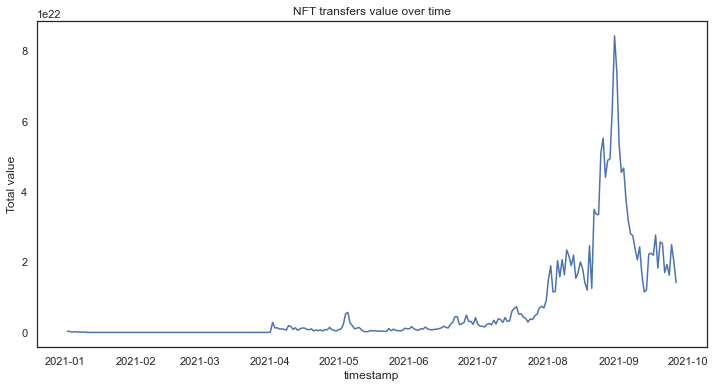

In [5]:
# Set the width and height of the figure
plt.figure(figsize=(12,6))
# Line chart showing the number of visitors to each museum over time
ax = sns.lineplot(data=num_df, x="timestamp", y="transaction_value")
ax.set(xlabel='timestamp', ylabel='Total value')
plt.title("NFT transfers value over time")
# Add title

In [6]:
print("number of unique addresses:", transfers["nft_address"].nunique())

number of unique addresses: 6765


In [7]:
# num_df = (transfers[["nft_address", "transaction_value", "timestamp"]

In [8]:
#create data frame where group together from_addresses and count size of each group (how many TX each address did in total)
from_series = transfers["from_address"].groupby(transfers["from_address"]).size()
#create data frame where group together from_addresses and count size of each group (how many TX each address did in total)
to_series = transfers["to_address"].groupby(transfers["to_address"]).size()

In [9]:
df = pd.DataFrame()
df = df.join(to_series.rename("to_count"), how='outer')
df = df.join(from_series.rename('from_count'), how='outer')

<Figure size 1728x1728 with 0 Axes>

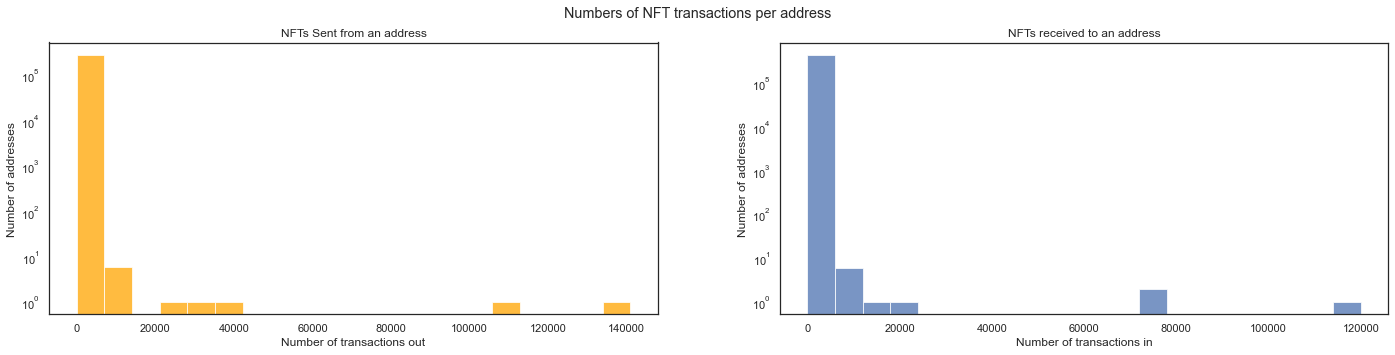

In [10]:
plt.figure(figsize=(24,24))
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(24, 5, forward=True)
fig.suptitle('Numbers of NFT transactions per address')
axs[0].hist(df["from_count"], density=False, alpha=0.75, log=True, bins=20, color='orange')
axs[0].set_title("NFTs Sent from an address")
axs[1].hist(df["to_count"], density=False, alpha=0.75, log=True, bins=20)
axs[1].set_title("NFTs received to an address")
plt.setp(axs[0], xlabel='Number of transactions out', ylabel='Number of addresses')
plt.setp(axs[1], xlabel='Number of transactions in', ylabel='Number of addresses')
print("")

In [11]:
df_small=df[df["to_count"]<10]
df_small=df_small[df_small["from_count"]<10]

<Figure size 1728x1728 with 0 Axes>

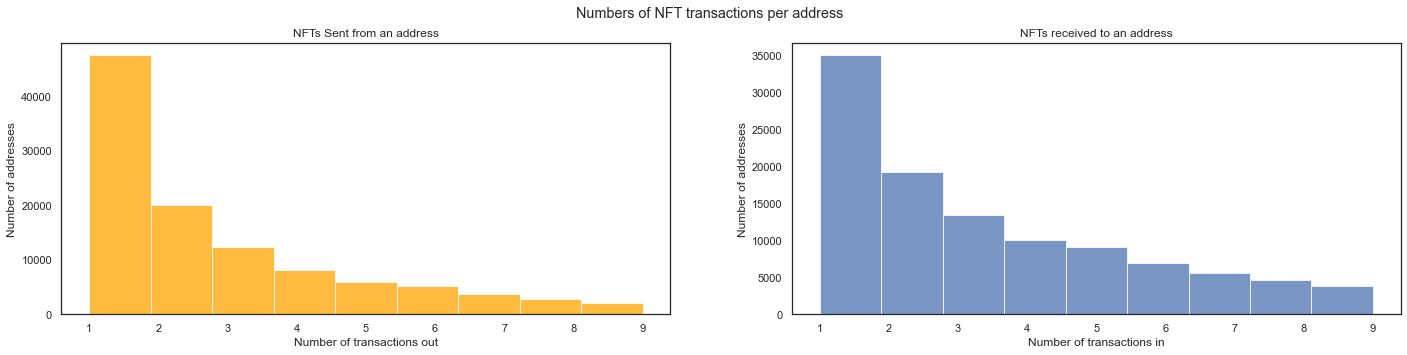

In [12]:
plt.figure(figsize=(24,24))
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(24, 5, forward=True)
fig.suptitle('Numbers of NFT transactions per address')
axs[0].hist(df_small["from_count"], density=False, alpha=0.75, log=False, bins=9, color='orange')
axs[0].set_title("NFTs Sent from an address")
axs[1].hist(df_small["to_count"], density=False, alpha=0.75, log=False, bins=9)
axs[1].set_title("NFTs received to an address")
plt.setp(axs[0], xlabel='Number of transactions out', ylabel='Number of addresses')
plt.setp(axs[1], xlabel='Number of transactions in', ylabel='Number of addresses')
print("")

In [13]:
whales_tx=df[df["from_count"]>60000]
whales_rx=df[df["to_count"]>60000]

In [14]:
whales_rx

,to_count,from_count
0x0000000000000000000000000000000000000000,119978.0,NaN
0xC69b4c6fFDBaF843A0d0588c99E3C67f27069BEa,74608.0,1.0
0xcDA72070E455bb31C7690a170224Ce43623d0B6f,76645.0,36116.0


### Whales RX info:
0x0000000000000000000000000000000000000000 - burn address

[0xC69b4c6fFDBaF843A0d0588c99E3C67f27069BEa](https://etherscan.io/address/0xC69b4c6fFDBaF843A0d0588c99E3C67f27069BEa) / [creator](https://etherscan.io/address/0xC69b4c6fFDBaF843A0d0588c99E3C67f27069BEa) / info: `ENS: ETH Registrar Controller `

[0xcDA72070E455bb31C7690a170224Ce43623d0B6f](https://etherscan.io/address/0xcDA72070E455bb31C7690a170224Ce43623d0B6f) / [creator](https://etherscan.io/address/0x95271d54d6e0d88b3825f89a766f97b8b7e8af82) / info: https://foundation.app

In [15]:
whales_tx

,to_count,from_count
0x283Af0B28c62C092C9727F1Ee09c02CA627EB7F5,2.0,140875.0
0x327305A797d92a39cEe1a225D7E2A1cC42B1a8fA,NaN,106620.0


### Whales TX info:

[0x283Af0B28c62C092C9727F1Ee09c02CA627EB7F5](https://etherscan.io/address/0x283Af0B28c62C092C9727F1Ee09c02CA627EB7F5) / [creator](https://etherscan.io/address/0x4fe4e666be5752f1fdd210f4ab5de2cc26e3e0e8) / info: `ENS: ETH Registrar Controller`

[0x327305A797d92a39cEe1a225D7E2A1cC42B1a8fA](https://etherscan.io/address/0x327305A797d92a39cEe1a225D7E2A1cC42B1a8fA) not a contract! / info: `???`

<Figure size 1728x1728 with 0 Axes>

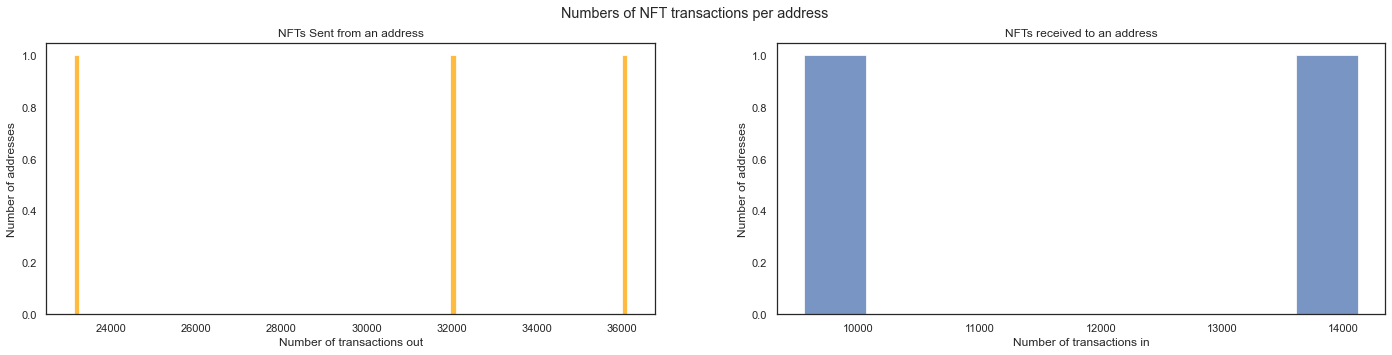

In [16]:
sharks_tx=df[df["from_count"]>20e3]
sharks_rx=df[df["to_count"]>20e3]
sharks_tx=sharks_tx[sharks_tx["from_count"]<60e3]
sharks_rx=sharks_tx[sharks_tx["to_count"]<60e3]

plt.figure(figsize=(24,24))
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(24, 5, forward=True)
fig.suptitle('Numbers of NFT transactions per address')
axs[0].hist(sharks_tx["from_count"], density=False, alpha=0.75, log=False, bins=100, color='orange')
axs[0].set_title("NFTs Sent from an address")
axs[1].hist(sharks_rx["to_count"], density=False, alpha=0.75, log=False, bins=9)
axs[1].set_title("NFTs received to an address")
plt.setp(axs[0], xlabel='Number of transactions out', ylabel='Number of addresses')
plt.setp(axs[1], xlabel='Number of transactions in', ylabel='Number of addresses')
print("")

In [17]:
sharks_tx

,to_count,from_count
0xE052113bd7D7700d623414a0a4585BCaE754E9d5,9552.0,31967.0
0xb1690C08E213a35Ed9bAb7B318DE14420FB57d8C,14124.0,23128.0
0xcDA72070E455bb31C7690a170224Ce43623d0B6f,76645.0,36116.0


### Sharks TX info:

[0xE052113bd7D7700d623414a0a4585BCaE754E9d5](https://etherscan.io/address/0xE052113bd7D7700d623414a0a4585BCaE754E9d5) /  not a contract! / info: `Nifty Gateway: Omnibus `

[0xb1690C08E213a35Ed9bAb7B318DE14420FB57d8C](https://etherscan.io/address/0xb1690C08E213a35Ed9bAb7B318DE14420FB57d8C) /  not a contract! / info: `CryptoKitties: Sales Auction `

[0xb1690C08E213a35Ed9bAb7B318DE14420FB57d8C](https://etherscan.io/address/0xcDA72070E455bb31C7690a170224Ce43623d0B6f) /  [creator](https://etherscan.io/address/0x95271d54d6e0d88b3825f89a766f97b8b7e8af82) / info: https://foundation.app

In [18]:
sharks_rx

,to_count,from_count
0xE052113bd7D7700d623414a0a4585BCaE754E9d5,9552.0,31967.0
0xb1690C08E213a35Ed9bAb7B318DE14420FB57d8C,14124.0,23128.0


### Sharks RX info:

[0xE052113bd7D7700d623414a0a4585BCaE754E9d5](https://etherscan.io/address/0xE052113bd7D7700d623414a0a4585BCaE754E9d5) /  not a contract! / info: `Nifty Gateway: Omnibus `

[0xb1690C08E213a35Ed9bAb7B318DE14420FB57d8C](https://etherscan.io/address/0xb1690C08E213a35Ed9bAb7B318DE14420FB57d8C) /  not a contract! / info: `CryptoKitties: Sales Auction `


In [19]:
#transfers not transactions
transactions_per_nft = transfers["nft_address"].groupby(transfers["nft_address"]).size()


In [20]:
transfers["transaction_value"] = pd.to_numeric(transfers["transaction_value"])
transfers["transaction_value"] = transfers["transaction_value"].fillna(0)
transfers["transaction_value"].head(15)

0     0.000000e+00
1     0.000000e+00
2     0.000000e+00
3     0.000000e+00
4     0.000000e+00
5     6.180000e+18
6     0.000000e+00
7     0.000000e+00
8     3.000000e+16
9     0.000000e+00
10    0.000000e+00
11    0.000000e+00
12    0.000000e+00
13    0.000000e+00
14    0.000000e+00
Name: transaction_value, dtype: float64

In [28]:
total_value_per_nft = transfers[["nft_address", "transaction_value"]].groupby(transfers["nft_address"]).sum()
total_value_per_nft.head(4)

,transaction_value
nft_address,
0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,0.000000e+00
0x000000000437b3CCE2530936156388Bff5578FC3,4.175880e+18
0x000000000A42C2791eEc307FFf43Fa5c640e3Ef7,0.000000e+00
0x000000F36EDb9d436Be73cDBf0DCa7dF3E6F3A50,0.000000e+00


In [34]:
most_popular_nfts = transactions_per_nft.sort_values(ascending=False).head(8)
most_valuable_nfts = total_value_per_nft["transaction_value"].sort_values(ascending=False).head(3)
most_valuable_nfts

nft_address
0xa7d8d9ef8D8Ce8992Df33D8b8CF4Aebabd5bD270    2.296429e+23
0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D    1.588150e+23
0x60E4d786628Fea6478F785A6d7e704777c86a7c6    7.530649e+22
Name: transaction_value, dtype: float64

In [35]:
#get frame with values over time
num_df = pd.DataFrame()
#cast to numeric
num_df = (transfers[["transaction_value", "timestamp"]].apply(pd.to_numeric, errors='coerce'))
#add nft_address column to it
num_df["nft_address"]=transfers["nft_address"]
#filter out only ones that are in most_popular_nft variable
num_df = num_df[num_df.nft_address.isin(list(most_valuable_nfts.index))]
#convert timestamp in to date time
num_df["timestamp"] = pd.to_datetime(num_df.timestamp, unit='s', errors='coerce')
#set index as timestamp
num_df = num_df.set_index("timestamp")

In [36]:
#group timestamps by day, create column per each nft_address, aggregate transaction value by count and sum
new_df = num_df.groupby([pd.Grouper(freq='d'), 'nft_address'])['transaction_value'].agg(transaction_value="sum")

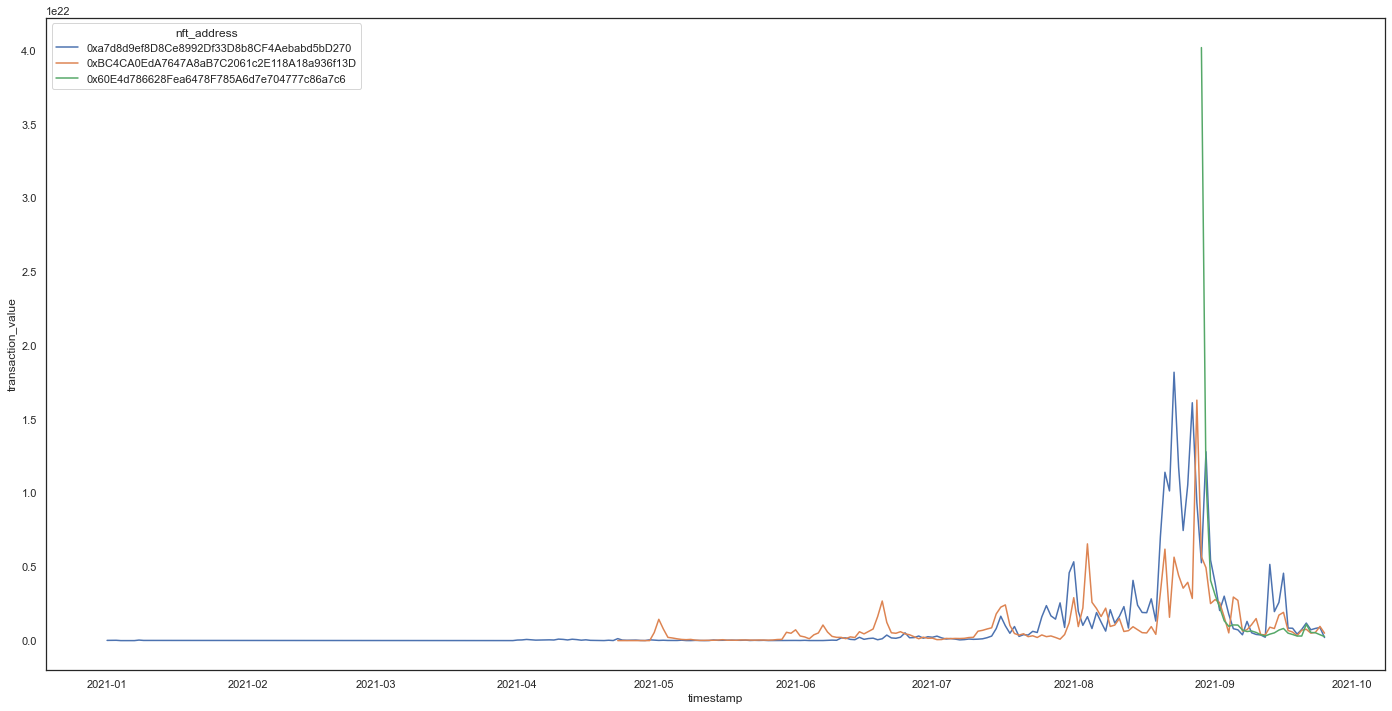

In [37]:
plt.figure(figsize=(24, 12))
# new_df.unstack()
ax = sns.lineplot(data=new_df, x='timestamp', y='transaction_value', hue='nft_address',)